# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.chdir(r'C:\Users\AKUBUNDU\Desktop\Company XYZ\Pandas-Analytics-Project/') #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [2]:
extension = 'csv'
path = r'C:\Users\AKUBUNDU\Desktop\Company XYZ\Pandas-Analytics-Project/'
files = glob.glob(path + '/*.csv')
print(files)

['C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\Abuja_Branch.csv', 'C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\Lagos_Branch.csv', 'C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\Port_Harcourt_Branch.csv', 'C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\xyz.csv']


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [3]:
xyz_abuja = pd.read_csv('C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\Abuja_Branch.csv')
xyz_lagos = pd.read_csv('C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\Lagos_Branch.csv')
xyz_ph = pd.read_csv('C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\Port_Harcourt_Branch.csv')


xyz = pd.concat([xyz_abuja, xyz_lagos, xyz_ph], keys = ["xyz_abuja", "xyz_lagos", "xyz_ph"])



In [4]:
xyz.to_csv(path + "/xyz.csv", index = False)



#### To-Do -Read the CSV file using `pd.read_csv` method

In [5]:
#read the saved csv file
xyz_data = pd.read_csv('C:\\Users\\AKUBUNDU\\Desktop\\Company XYZ\\Pandas-Analytics-Project\\xyz.csv')
xyz_data.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [7]:
xyz_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [8]:
xyz_data.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [9]:
xyz_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
columns = pd.DataFrame(xyz_data.columns, columns=['Columns'])
columns

,Columns
0,Invoice ID
1,Branch
2,City
3,Customer type
4,Gender
5,Product line
6,Unit price
7,Quantity
8,Tax 5%
9,Total


#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [11]:
xyz_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

A close look at the data statistical summary reveals that the  mean amount paid in Tax of goods sold is exactly same as the gross income. This shows an error (or duplicate values entry) in the dataset between the Tax and gross income.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [12]:
xyz_data.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Check the number of missing value for each column
xyz_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
# Check if we have any missing value
xyz_data.isnull().values.any()



False

## There are no missing values in the data

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [15]:
xyz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [16]:
xyz_data['Date'] = pd.to_datetime(xyz_data['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [17]:
xyz_data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

#### To-Do - Repeat the two steps above to the `time` column

In [18]:
xyz_data['Time'] = pd.to_datetime(xyz_data['Time'])

In [19]:
xyz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [20]:
xyz_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2022-08-12 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2022-08-12 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2022-08-12 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2022-08-12 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2022-08-12 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [21]:
xyz_data['Day'] = xyz_data['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [22]:
xyz_data['Month'] = xyz_data['Date'].dt.month
xyz_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2022-08-12 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2022-08-12 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2022-08-12 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2022-08-12 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2022-08-12 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3


#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [23]:
xyz_data['Year'] = xyz_data['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [24]:
xyz_data['Hour'] = xyz_data['Time'].dt.hour
xyz_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-08-12 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-08-12 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-08-12 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-08-12 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-08-12 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [25]:
xyz_data['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [26]:
#[Write your Code Here]

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [27]:
categorical_columns = [col for col in xyz_data.columns if xyz_data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [28]:
xyz_data['Branch'].unique().tolist()

['B', 'A', 'C']

In [29]:
print("Total Number of unique values in the Branch Column : {}".format(len(xyz_data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [30]:
for col in categorical_columns:
    xyz_list = xyz_data[col].unique().tolist()
    print(xyz_list)
    print ("Total number of unique values in the", cols,"Column : {}". format(len(xyz_list)))

['692-92-5582', '351-62-0822', '529-56-3974', '299-46-1805', '319-50-3348', '371-85-5789', '273-16-6619', '649-29-6775', '145-94-9061', '871-79-8483', '149-71-6266', '640-49-2076', '777-82-7220', '280-35-5823', '354-25-5821', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '616-24-2851', '242-55-6721', '347-34-2234', '853-23-2453', '109-28-2512', '510-95-6347', '847-38-7188', '318-68-5053', '152-08-9985', '766-85-7061', '733-01-9107', '716-39-1409', '479-26-8945', '227-78-1148', '291-32-1427', '659-65-8956', '378-24-2715', '219-22-9386', '268-27-6179', '549-84-7482', '191-10-6171', '695-51-0018', '590-83-4591', '241-72-9525', '262-47-2794', '608-96-3517', '279-74-2924', '307-85-2293', '743-04-1105', '423-57-2993', '548-46-9322', '505-02-0892', '316-55-4634', '608-27-6295', '414-12-7047', '895-66-0685', '305-14-0245', '732-04-5373', '284-34-9626', '437-58-8131', '641-43-2399', '542-41-0513', '875-46-5808', '394-43-4238', '573-58-9734', '817-69-8206', '142-63-6033', '656-16-1

NameError: name 'cols' is not defined

#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [31]:
for col in categorical_columns:
    val = xyz_data[col].value_counts()
    print (val)



750-57-9686    1
257-60-7754    1
322-02-2271    1
746-54-5508    1
236-86-3015    1
              ..
534-53-3526    1
700-81-1757    1
803-17-8013    1
148-82-2527    1
718-57-9773    1
Name: Invoice ID, Length: 1000, dtype: int64
A    340
B    332
C    328
Name: Branch, dtype: int64
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


In [32]:
xyz_data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [33]:
xyz_data.groupby('City').aggregate(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year        Hour             
                   mean     sum  mean   sum       mean  
City                                                    
Abuja          2.003012  670308  2019  5029  15.147590  
Lagos          2.023529  686460  2019  4987  14.667647  
Port Harcourt  1.951220  662232  2019  4894  14.920732  

[3 rows x 24 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [34]:
xyz_gross = xyz_data.groupby('City')['gross income'].aggregate(['sum','mean'])

In [35]:
xyz_gross

,sum,mean
City,,
Abuja,1820531.52,5483.528675
Lagos,1820577.78,5354.640529
Port Harcourt,1895463.54,5778.852256


This table shows Port Harcourt has the highest total gross income

In [36]:
xyz_data.groupby('City')['Quantity'].aggregate(['sum','mean']) 

,sum,mean
City,,
Abuja,1820,5.481928
Lagos,1859,5.467647
Port Harcourt,1831,5.582317


In [37]:
xyz_data.groupby('City')['Unit price'].aggregate(['sum','mean'])

,sum,mean
City,,
Abuja,6652396.8,20037.339759
Lagos,6705176.4,19721.107059
Port Harcourt,6684393.6,20379.248780


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

In [38]:
xyz_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-08-12 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-08-12 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-08-12 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-08-12 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-08-12 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


Text(0.5, 1.0, 'Branch with Highest Sales Record')

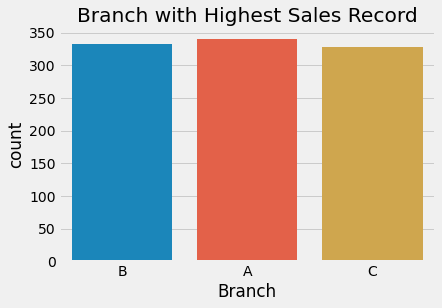

In [39]:
branch_data = sns.countplot(x='Branch',data=xyz_data)
branch_data.set_title('Branch with Highest Sales Record')

#### Explore a countplot for the `Payment` and `City` Column

Text(0.5, 1.0, 'Most Used Payment Method')

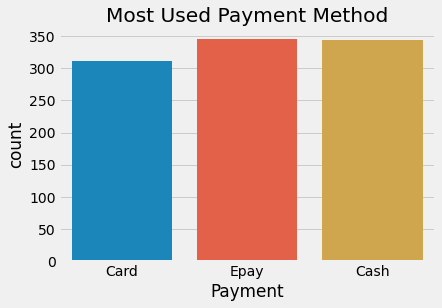

In [40]:
branch_data = sns.countplot(x = "Payment", data = xyz_data)
branch_data.set_title("Most Used Payment Method")



Text(0.5, 1.0, 'City with most sales')

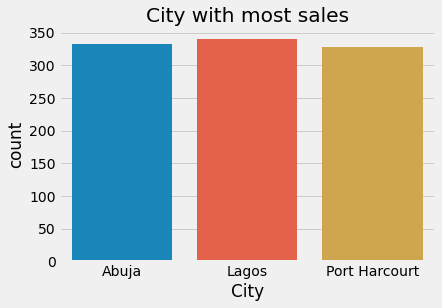

In [41]:
branch_data = sns.countplot(x = "City", data = xyz_data)
branch_data.set_title("City with most sales")


#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

In [42]:
xyz_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-08-12 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-08-12 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-08-12 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-08-12 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-08-12 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


Text(0.5, 1.0, 'Product Line Sales')

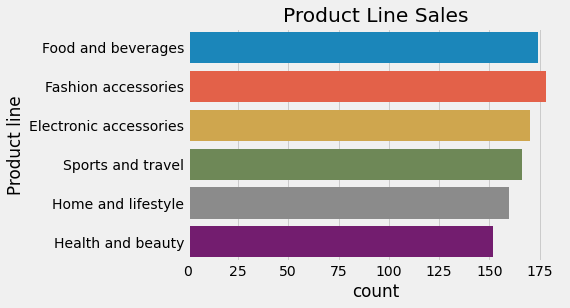

In [43]:
branch_data = sns.countplot(y = 'Product line', data = xyz_data)
branch_data.set_title('Product Line Sales')

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Product Line by Payment method')

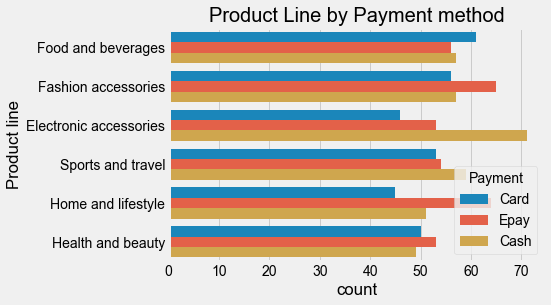

In [44]:
branch_data=sns.countplot(y="Product line", hue = "Payment", data = xyz_data)
sns.set(rc= {"figure.figsize":(10,5)})
branch_data.set_title("Product Line by Payment method", fontsize = 20)

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Payment Channel by Branch')

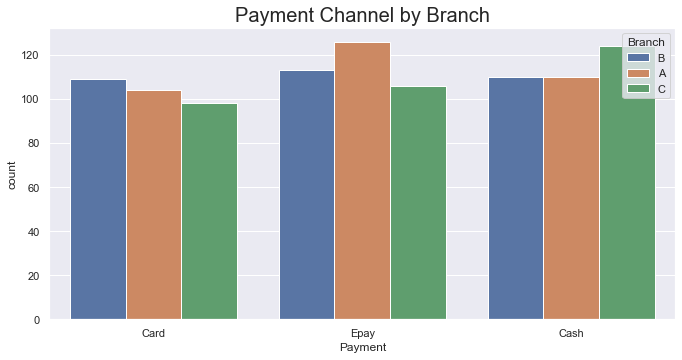

In [45]:
branch_data = sns.countplot(x = "Payment", hue = "Branch", data = xyz_data)
sns.set(rc= {"figure.figsize":(10,5)})
branch_data.set_title("Payment Channel by Branch", fontsize = 20)



Text(0.5, 1.0, 'Product Line by Branch')

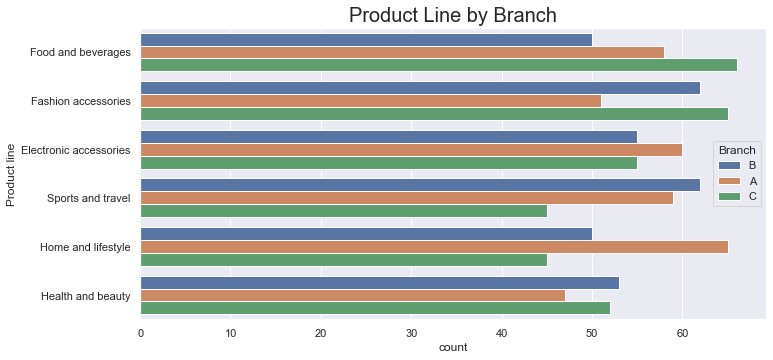

In [46]:
branch_data = sns.countplot(y = "Product line", hue = "Branch", data = xyz_data)
sns.set(rc= {"figure.figsize":(10,5)})
branch_data.set_title("Product Line by Branch", fontsize = 20)

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Rating')

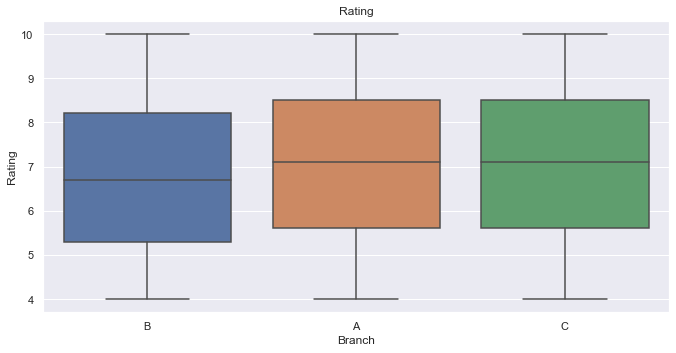

In [47]:
ax=sns.boxplot(x="Branch", y="Rating", data = xyz_data)
ax.set_title("Rating")

In [48]:
#[Write your answer here]

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

Text(0.5, 1.0, 'Product Line Quantity Sold by Gender')

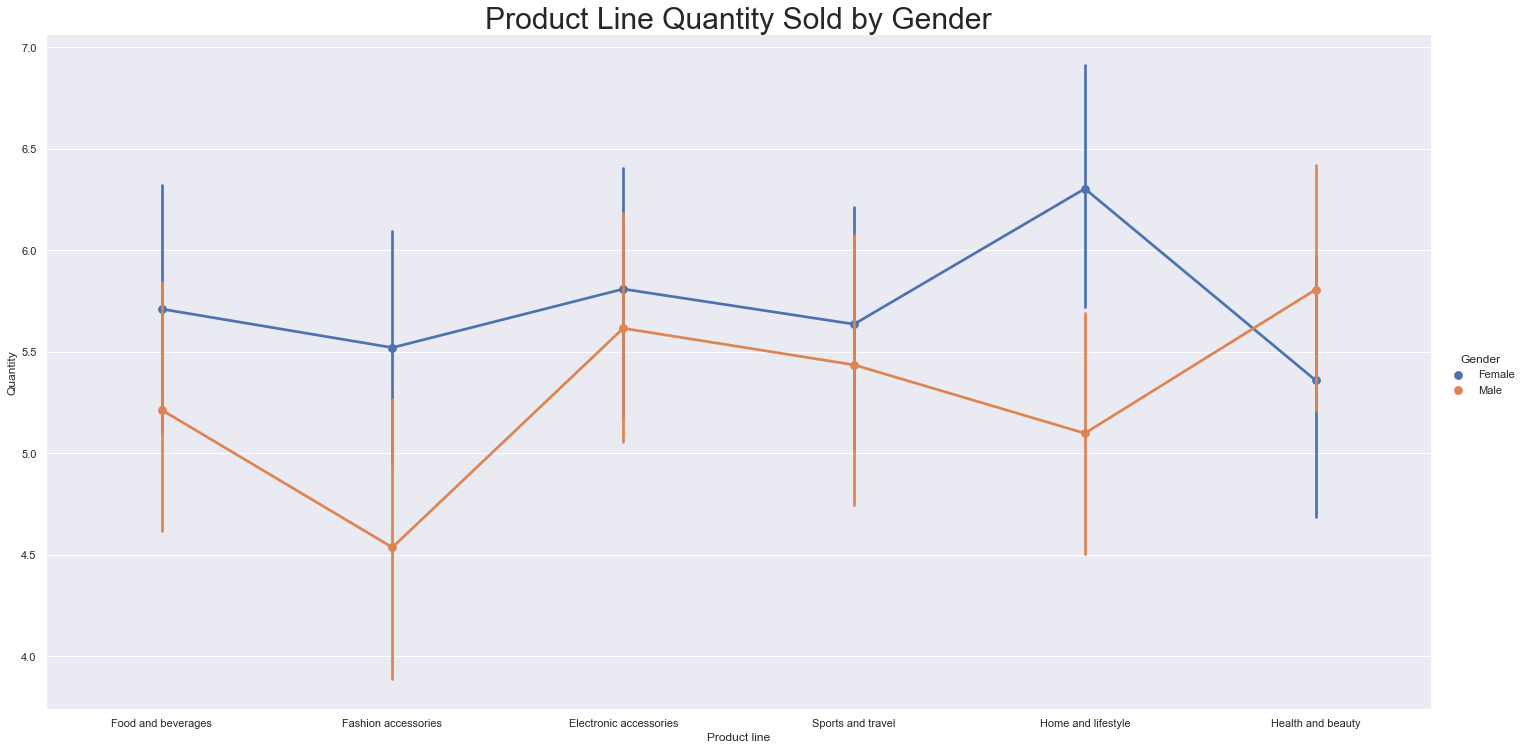

In [51]:
gender_data = sns.catplot(x= "Product line", y = "Quantity", hue = "Gender", kind = "point", data = xyz_data, aspect = 2, height = 10)
gender_data.ax.set_title("Product Line Quantity Sold by Gender", fontsize = 30)





Text(0.5, 1.0, 'Product Line vs Total per Gender')

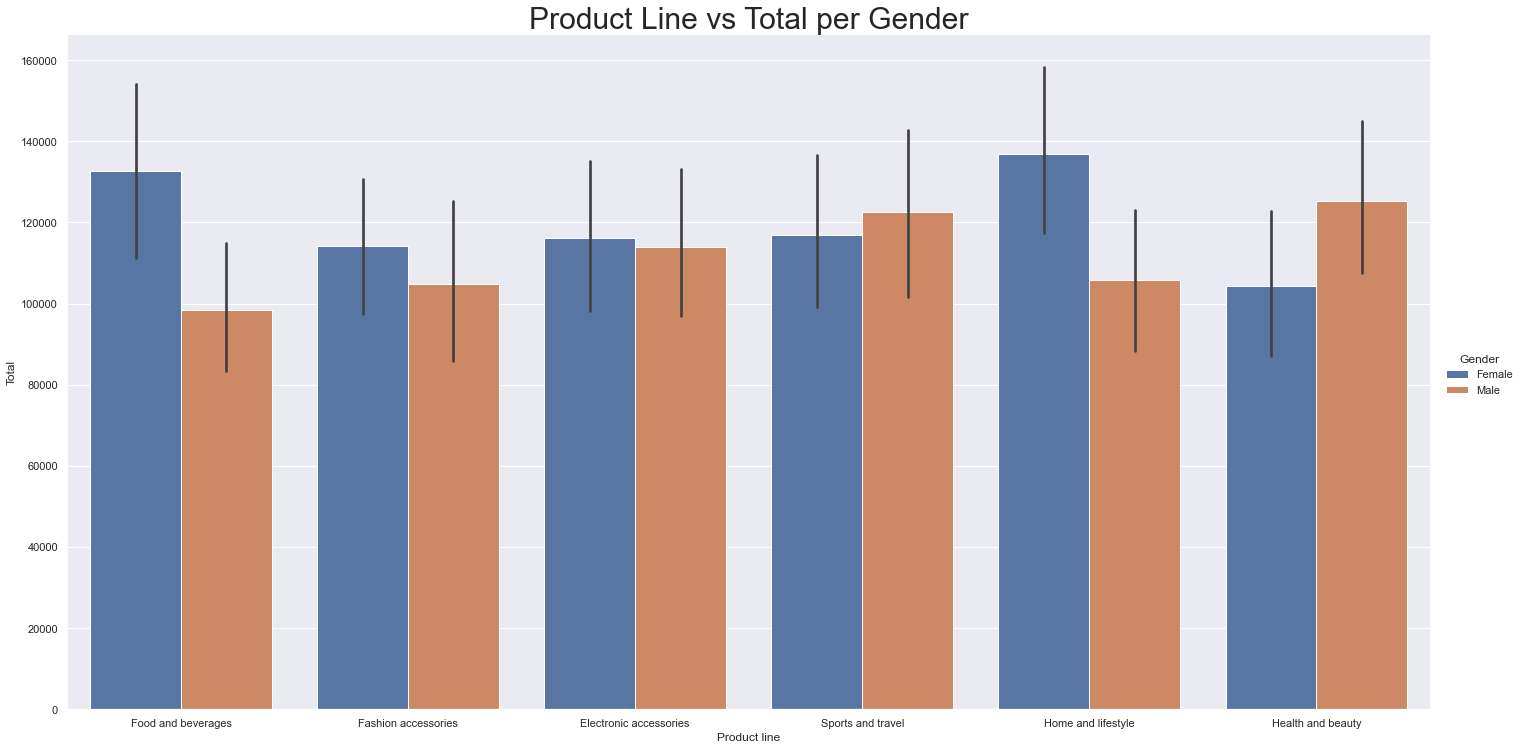

In [52]:
gender_data = sns.catplot(x= "Product line", y = "Total", hue = "Gender", data = xyz_data, kind = "bar", aspect = 2, height = 10)
gender_data.ax.set_title("Product Line vs Totaltt per Gender", fontsize = 30)


#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

Text(0.5, 1.0, 'Quantity by Unit Price')

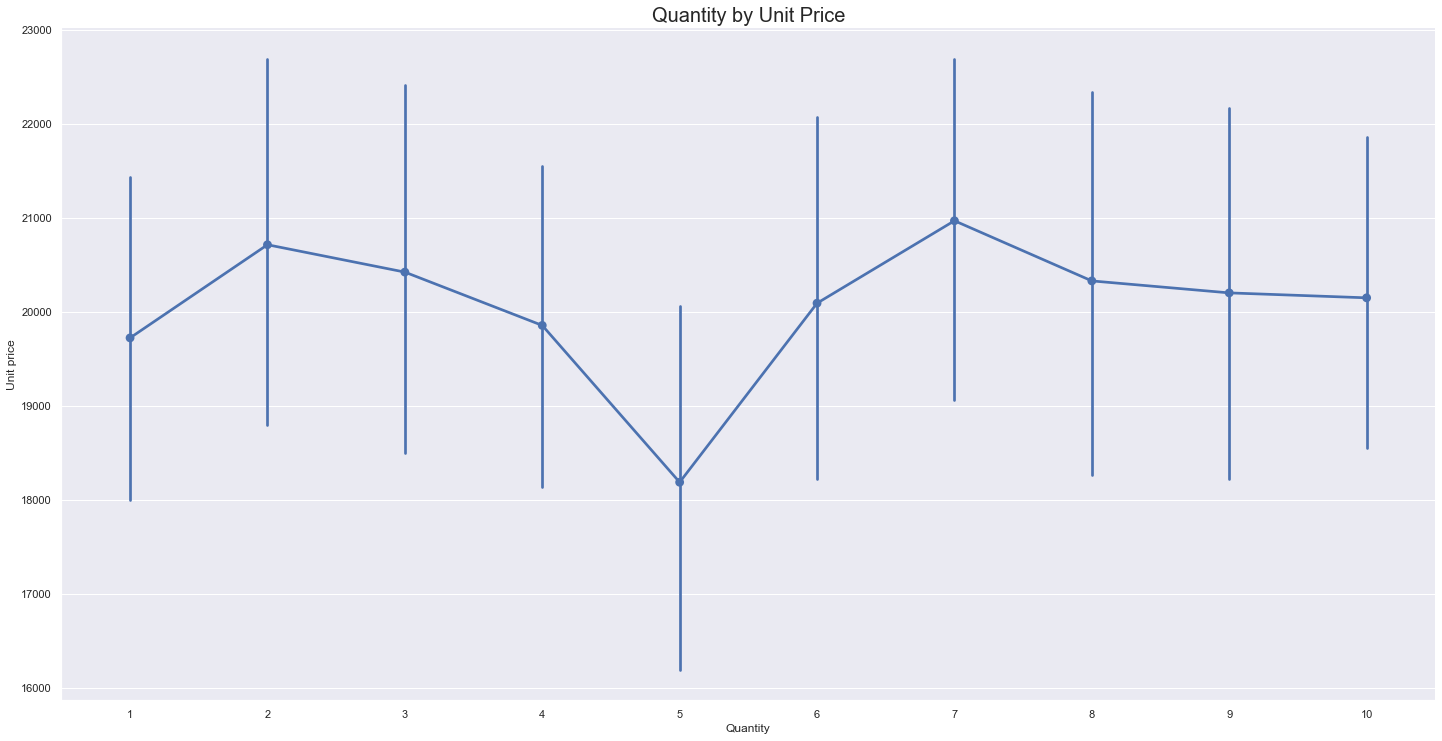

In [53]:
branch_data = sns.catplot(x= "Quantity", y = "Unit price", data = xyz_data, kind = "point", aspect = 2, height = 10)
branch_data.ax.set_title("Quantity by Unit Price", fontsize = 20)

In [ ]:
#[Write your Code Here]

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


In [54]:
hour = xyz_data.groupby(by = "Hour").sum()
hour

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
Hour,,,,,,,,,,,
10,2095336.8,525,538653.96,11311733.16,10773079.2,480.952381,538653.96,716.9,1600,193,203919
11,1840550.4,513,520754.22,10935838.62,10415084.4,428.571429,520754.22,612.6,1294,169,181710
12,1611342.0,501,446843.70,9383717.70,8936874.0,423.809524,446843.70,649.7,1239,179,179691
13,2015737.2,585,595255.32,12500361.72,11905106.4,490.476190,595255.32,724.1,1521,205,207957
14,1715634.0,495,528486.84,11098223.64,10569736.8,395.238095,528486.84,575.6,1364,167,167577
15,1973332.8,530,534505.86,11224623.06,10690117.2,485.714286,534505.86,701.4,1538,204,205938
16,1672830.0,420,432451.26,9081476.46,8649025.2,366.666667,432451.26,528.2,1182,158,155463
17,1513630.8,415,419060.88,8800278.48,8381217.6,352.380952,419060.88,513.5,1231,145,149406
18,1736416.8,475,446234.40,9370922.40,8924688.0,442.857143,446234.40,668.4,1439,189,187767


Text(0.5, 1.0, 'Total Sold by Hour of Day')

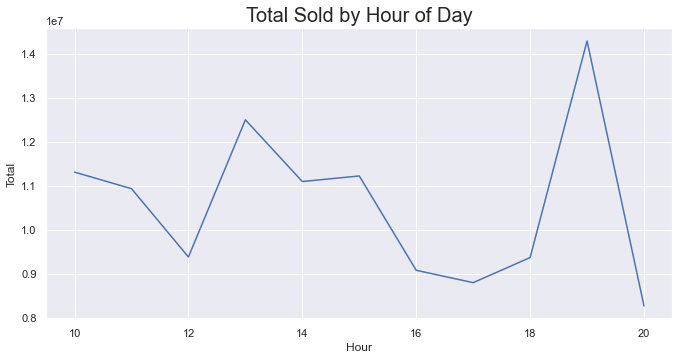

In [55]:
sns.set_style = "whitegrid"
sns.despine()
f = sns.lineplot(data = hour, x = hour.index, y= "Total")
sns.set(rc= {"figure.figsize":(10,10)})
f.set_title("Total Sold by Hour of Day", fontsize = 20)

In [56]:
month = xyz_data.groupby(by = "Month").sum()
month

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Year,Hour
Month,,,,,,,,,,,
1,7111400.4,1965,1993574.88,41865072.48,39871497.6,1676.190476,1993574.88,2470.2,6013,710688,5215
2,6177427.2,1654,1666617.84,34998974.64,33332356.8,1442.857143,1666617.84,2142.6,4200,611757,4468
3,6753139.2,1891,1876380.12,39403982.52,37527602.4,1642.857143,1876380.12,2359.9,5043,696555,5227


Text(0.5, 1.0, 'Total Sales by Month')

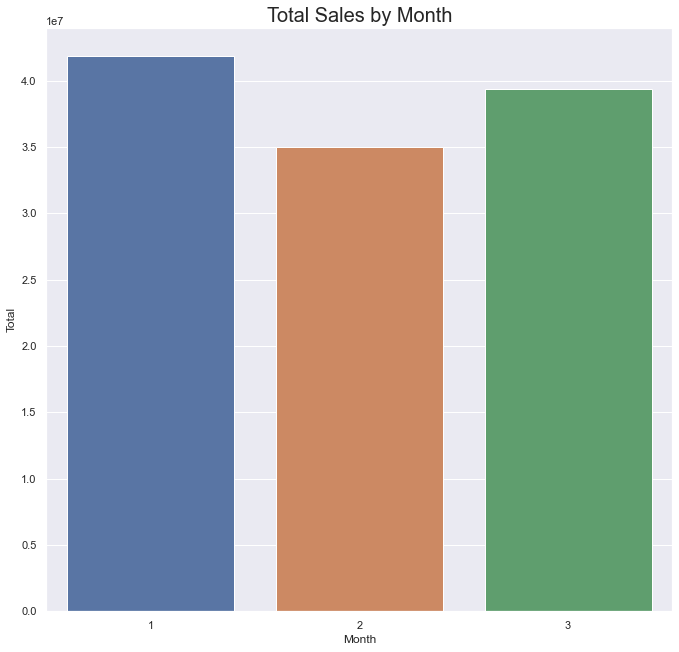

In [57]:
a = sns.barplot(data = month, x = month.index, y = "Total")
a.set_title("Total Sales by Month", fontsize = 20)

Text(0.5, 1.0, 'Monthly Gross Income Per Product Line ')

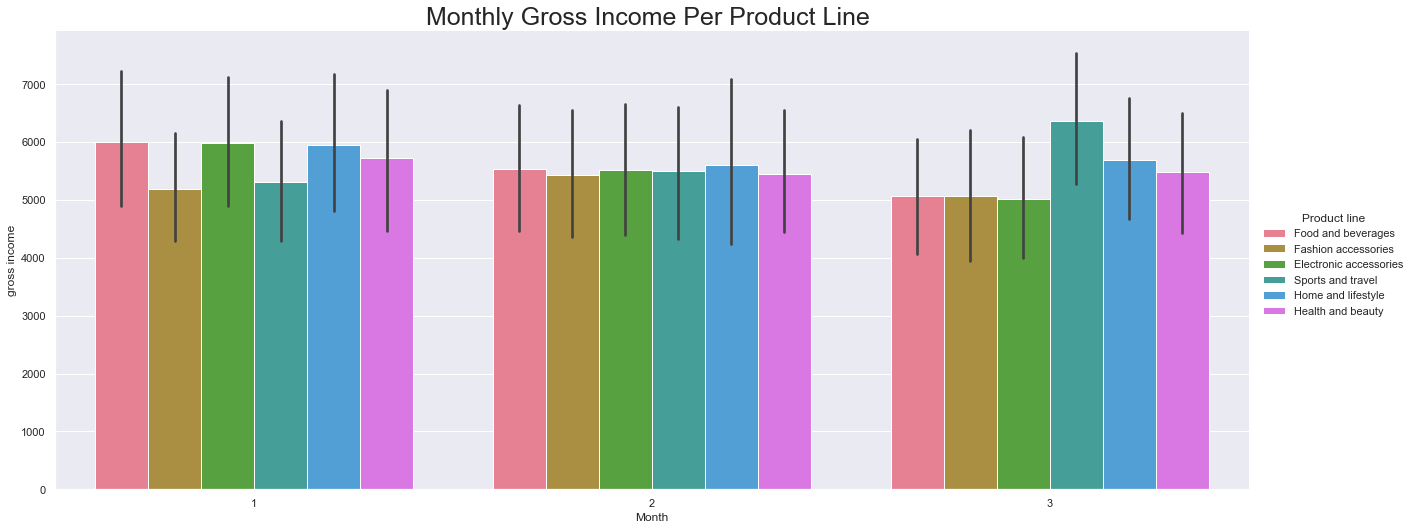

In [58]:
b = sns.catplot(data = xyz_data, x = "Month", y = "gross income", kind = "bar", hue = "Product line",
           height = 7, aspect = 2.5, palette = "husl")
b.ax.set_title("Monthly Gross Income Per Product Line ", fontsize = 25)

Text(0.5, 1.0, 'Product Line by Gross Income')

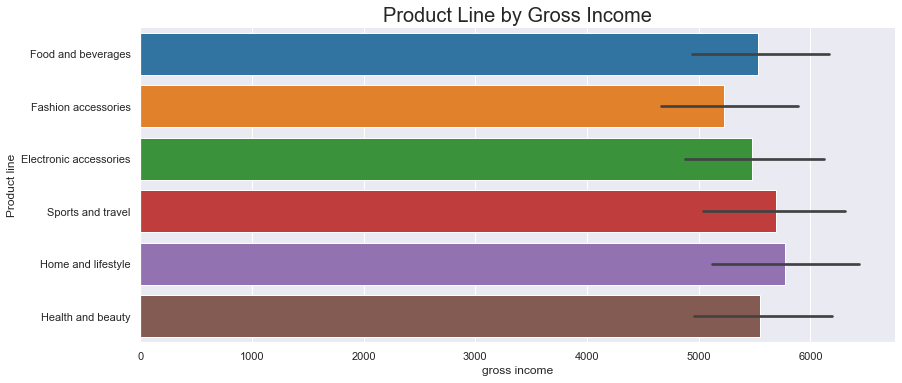

In [59]:
c = sns.catplot(data = xyz_data, x = "gross income", y = "Product line", kind = "bar",
           height = 5, aspect = 2.5, palette = "tab10")
c.ax.set_title("Product Line by Gross Income", fontsize = 20)

Text(0.5, 1.0, 'Customer Type by Gross Income')

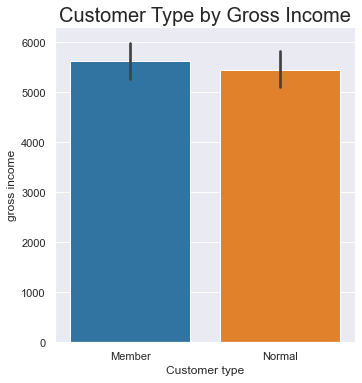

In [60]:
c = sns.catplot(data = xyz_data, x = "Customer type", y = "gross income", kind = "bar",
           height = 5, aspect = 1, palette = "tab10")
c.ax.set_title("Customer Type by Gross Income", fontsize = 20)

Text(0.5, 1.0, 'Product Line by Quantity Sold Per Member Type')

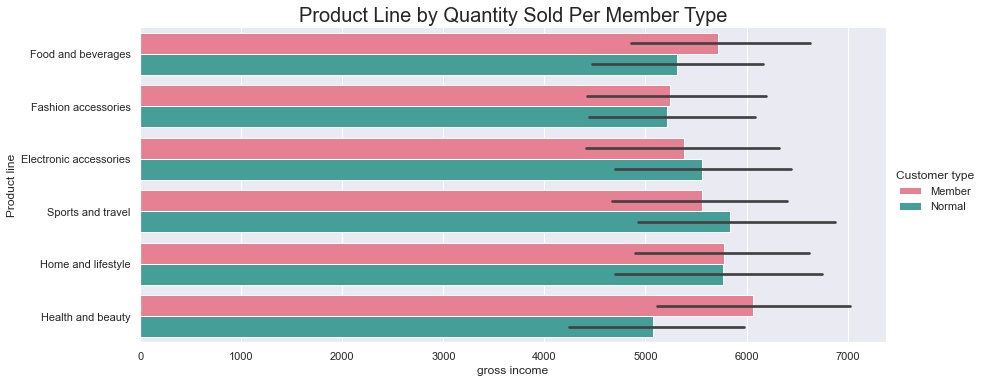

In [61]:
c = sns.catplot(data = xyz_data, x = "gross income", y = "Product line", hue = "Customer type", kind = "bar",
           height = 5, aspect = 2.5, palette = "husl")
c.ax.set_title("Product Line by Quantity Sold Per Member Type", fontsize = 20)

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 